<a href="https://colab.research.google.com/github/JaquelineMera/p2_validacion_hipotesis_spotify/blob/main/regresionlinealsimple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Autenticar con Google Cloud
from google.colab import auth
auth.authenticate_user()
# Importa la biblioteca bigquery del paquete google.cloud
from google.cloud import bigquery
import pandas as pd
# Declarar el proyecto, dataset y tabla
project_id = "proyecto2-hipotesis-spotify"
dataset = "dataset_spotify"
table = "dataset_spotify_03"
# Configurar el cliente de BigQuery con el ID del proyecto
client = bigquery.Client(project=project_id)
# Ejecutar la Consulta en BigQuery
query = f"""
SELECT *
FROM `{project_id}.{dataset}.{table}`
"""


# Ejecutar la consulta y convertir los resultados en un DataFrame de pandas
df = client.query(query).to_dataframe()


# Mostrar las primeras filas del DataFrame
print(df.head())

  track_id track_name_limpio artist_name_limpio  artist_count  released_year  \
0  1406287  I Wanna Be Yours     Arctic Monkeys             1           2013   
1  3921634       Blank Space       Taylor Swift             1           2014   
2  4796316             Style       Taylor Swift             1           2014   
3  4527090            Yellow      Chris Molitor             1           1999   
4  3126367      Viva La Vida           Coldplay             1           2008   

   released_month  released_day release_date  in_spotify_playlists  \
0               1             1   2013-01-01                 12859   
1               1             1   2014-01-01                 11434   
2               1             1   2014-01-01                  7830   
3               1             1   1999-01-01                 31358   
4               1             1   2008-01-01                 33898   

   in_spotify_charts  ...  total_playlist  cat_streams  cat_bpm  \
0                110  ...      

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Number of samples in X: 947, Number of samples in Y: 947
Error Cuadrático Medio (MSE): 3.784593677859401e+17
Coeficiente de Determinación (R²): -0.0013100908275518464


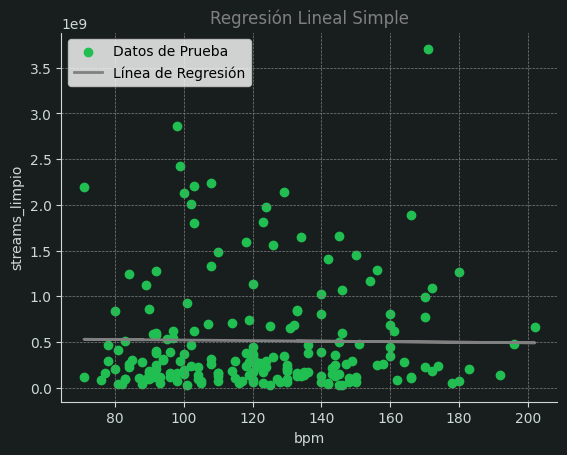


Datos del modelo Regresión Lineal Simple

Valor de la pendiente o coeficiente "a":
[-291393.93944902]
Valor de la intersección o coeficiente "b":
549739191.2898518

La ecuación del modelo es igual a:
y = a * x + b
y = [-291393.93944902] * x + 549739191.2898518
Precisión del modelo:
0.00021431896607859713


In [3]:
# Definir las columnas para X y Y para H1 BPM vs Streams
X_column = 'bpm'
Y_column = 'streams_limpio'

# Eliminar filas con valores faltantes en X o Y
df_clean = df.dropna(subset=[X_column, Y_column])

# Extraer los datos correspondientes después de eliminar valores faltantes
X = df_clean[[X_column]]
Y = df_clean[Y_column]

# Asegurarse de que X y Y tengan el mismo número de filas
print(f"Number of samples in X: {len(X)}, Number of samples in Y: {len(Y)}")

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(Y_test, Y_pred)
print('Error Cuadrático Medio (MSE):', mse)

r2 = r2_score(Y_test, Y_pred)
print('Coeficiente de Determinación (R²):', r2)

# Visualizar la línea de regresión
plt.scatter(X_test, Y_test, color='#21BE51', label='Datos de Prueba')
plt.plot(X_test, Y_pred, color='gray', linewidth=2, label='Línea de Regresión')
plt.xlabel(X_column, color='#CFD9D4')
plt.ylabel(Y_column, color='#CFD9D4')
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.title('Regresión Lineal Simple', color='gray')
plt.gca().set_facecolor('#181E1E')
plt.gcf().set_facecolor('#181E1E')

# Cambiar el color de las líneas de los ejes
plt.gca().spines['bottom'].set_color('#CFD9D4')
plt.gca().spines['left'].set_color('#CFD9D4')
plt.gca().spines['top'].set_color('#181E1E')
plt.gca().spines['right'].set_color('#181E1E')

# Cambiar el color de los ticks de los ejes
plt.gca().tick_params(axis='x', colors='#CFD9D4')
plt.gca().tick_params(axis='y', colors='#CFD9D4')

plt.legend()
plt.show()

# Datos del modelo de Regresión Lineal Simple
print()
print('Datos del modelo Regresión Lineal Simple')
print()
print('Valor de la pendiente o coeficiente "a":')
print(model.coef_)
print('Valor de la intersección o coeficiente "b":')
print(model.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('y = a * x + b')
print('y =', model.coef_, '* x +', model.intercept_)
print('Precisión del modelo:')
print(model.score(X_train, Y_train))

Number of samples in X: 947, Number of samples in Y: 947
Error Cuadrático Medio (MSE): 222.58174559057505
Coeficiente de Determinación (R²): 0.30291283914634604


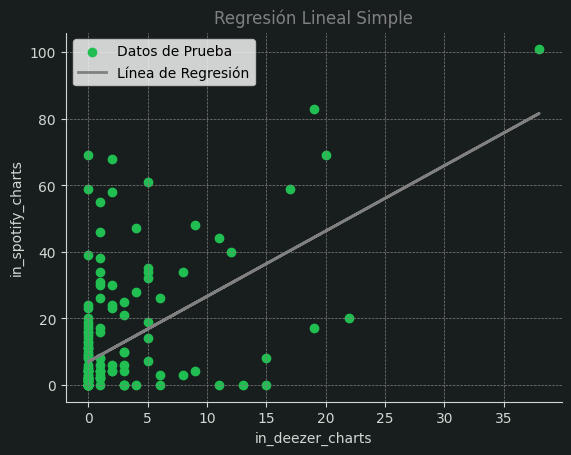


Datos del modelo Regresión Lineal Simple

Valor de la pendiente o coeficiente "a":
[1.96468903]
Valor de la intersección o coeficiente "b":
6.9275320369256645

La ecuación del modelo es igual a:
y = a * x + b
y = [1.96468903] * x + 6.9275320369256645
Precisión del modelo:
0.37763702407607325


In [4]:
# Definir las columnas para X y Y para H2 Ranking Deezer vs Ranking Spotify
X_column = 'in_deezer_charts'
Y_column = 'in_spotify_charts'

# Eliminar filas con valores faltantes en X o Y
df_clean = df.dropna(subset=[X_column, Y_column])

# Extraer los datos correspondientes después de eliminar valores faltantes
X = df_clean[[X_column]]
Y = df_clean[Y_column]

# Asegurarse de que X y Y tengan el mismo número de filas
print(f"Number of samples in X: {len(X)}, Number of samples in Y: {len(Y)}")

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(Y_test, Y_pred)
print('Error Cuadrático Medio (MSE):', mse)

r2 = r2_score(Y_test, Y_pred)
print('Coeficiente de Determinación (R²):', r2)

# Visualizar la línea de regresión
plt.scatter(X_test, Y_test, color='#21BE51', label='Datos de Prueba')
plt.plot(X_test, Y_pred, color='gray', linewidth=2, label='Línea de Regresión')
plt.xlabel(X_column, color='#CFD9D4')
plt.ylabel(Y_column, color='#CFD9D4')
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.title('Regresión Lineal Simple', color='gray')
plt.gca().set_facecolor('#181E1E')
plt.gcf().set_facecolor('#181E1E')

# Cambiar el color de las líneas de los ejes
plt.gca().spines['bottom'].set_color('#CFD9D4')
plt.gca().spines['left'].set_color('#CFD9D4')
plt.gca().spines['top'].set_color('#181E1E')
plt.gca().spines['right'].set_color('#181E1E')

# Cambiar el color de los ticks de los ejes
plt.gca().tick_params(axis='x', colors='#CFD9D4')
plt.gca().tick_params(axis='y', colors='#CFD9D4')

plt.legend()
plt.show()

# Datos del modelo de Regresión Lineal Simple
print()
print('Datos del modelo Regresión Lineal Simple')
print()
print('Valor de la pendiente o coeficiente "a":')
print(model.coef_)
print('Valor de la intersección o coeficiente "b":')
print(model.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('y = a * x + b')
print('y =', model.coef_, '* x +', model.intercept_)
print('Precisión del modelo:')
print(model.score(X_train, Y_train))

Number of samples in X: 947, Number of samples in Y: 947
Error Cuadrático Medio (MSE): 274.5030481953487
Coeficiente de Determinación (R²): 0.14030438567882297


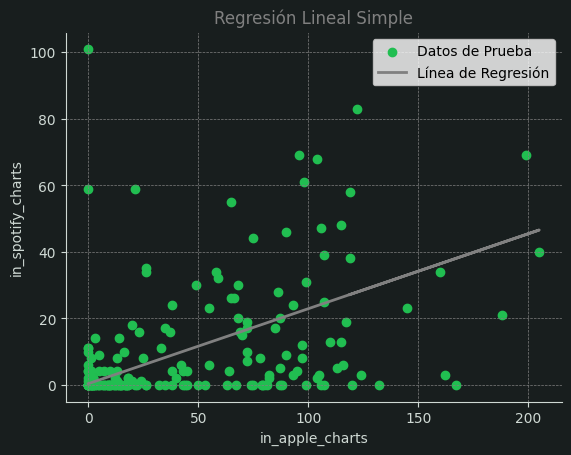


Datos del modelo Regresión Lineal Simple

Valor de la pendiente o coeficiente "a":
[0.22531049]
Valor de la intersección o coeficiente "b":
0.3393536612675092

La ecuación del modelo es igual a:
y = a * x + b
y = [0.22531049] * x + 0.3393536612675092
Precisión del modelo:
0.3349575648964922


In [5]:
# Definir las columnas para X y Y para H2 Ranking Deezer vs Ranking Spotify
X_column = 'in_apple_charts'
Y_column = 'in_spotify_charts'

# Eliminar filas con valores faltantes en X o Y
df_clean = df.dropna(subset=[X_column, Y_column])

# Extraer los datos correspondientes después de eliminar valores faltantes
X = df_clean[[X_column]]
Y = df_clean[Y_column]

# Asegurarse de que X y Y tengan el mismo número de filas
print(f"Number of samples in X: {len(X)}, Number of samples in Y: {len(Y)}")

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(Y_test, Y_pred)
print('Error Cuadrático Medio (MSE):', mse)

r2 = r2_score(Y_test, Y_pred)
print('Coeficiente de Determinación (R²):', r2)

# Visualizar la línea de regresión
plt.scatter(X_test, Y_test, color='#21BE51', label='Datos de Prueba')
plt.plot(X_test, Y_pred, color='gray', linewidth=2, label='Línea de Regresión')
plt.xlabel(X_column, color='#CFD9D4')
plt.ylabel(Y_column, color='#CFD9D4')
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.title('Regresión Lineal Simple', color='gray')
plt.gca().set_facecolor('#181E1E')
plt.gcf().set_facecolor('#181E1E')

# Cambiar el color de las líneas de los ejes
plt.gca().spines['bottom'].set_color('#CFD9D4')
plt.gca().spines['left'].set_color('#CFD9D4')
plt.gca().spines['top'].set_color('#181E1E')
plt.gca().spines['right'].set_color('#181E1E')

# Cambiar el color de los ticks de los ejes
plt.gca().tick_params(axis='x', colors='#CFD9D4')
plt.gca().tick_params(axis='y', colors='#CFD9D4')

plt.legend()
plt.show()

# Datos del modelo de Regresión Lineal Simple
print()
print('Datos del modelo Regresión Lineal Simple')
print()
print('Valor de la pendiente o coeficiente "a":')
print(model.coef_)
print('Valor de la intersección o coeficiente "b":')
print(model.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('y = a * x + b')
print('y =', model.coef_, '* x +', model.intercept_)
print('Precisión del modelo:')
print(model.score(X_train, Y_train))

Number of samples in X: 897, Number of samples in Y: 897
Error Cuadrático Medio (MSE): 19739.26341642454
Coeficiente de Determinación (R²): 0.14072216806423077


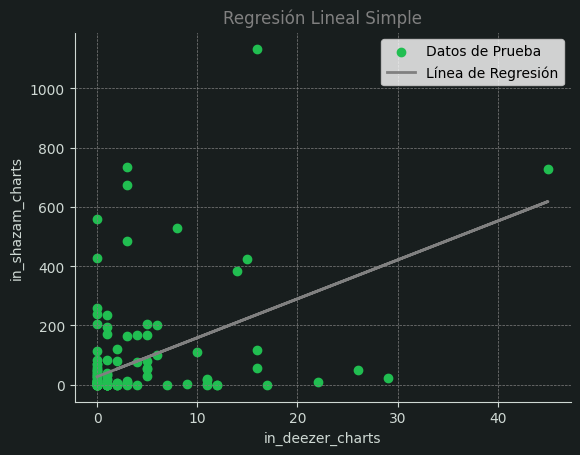


Datos del modelo Regresión Lineal Simple

Valor de la pendiente o coeficiente "a":
[13.12664762]
Valor de la intersección o coeficiente "b":
27.344538744804247

La ecuación del modelo es igual a:
y = a * x + b
y = [13.12664762] * x + 27.344538744804247
Precisión del modelo:
0.20911872050059144


In [6]:
# Definir las columnas para X y Y para H2 Ranking Deezer vs Ranking Spotify
X_column = 'in_deezer_charts'
Y_column = 'in_shazam_charts'

# Eliminar filas con valores faltantes en X o Y
df_clean = df.dropna(subset=[X_column, Y_column])

# Extraer los datos correspondientes después de eliminar valores faltantes
X = df_clean[[X_column]]
Y = df_clean[Y_column]

# Asegurarse de que X y Y tengan el mismo número de filas
print(f"Number of samples in X: {len(X)}, Number of samples in Y: {len(Y)}")

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(Y_test, Y_pred)
print('Error Cuadrático Medio (MSE):', mse)

r2 = r2_score(Y_test, Y_pred)
print('Coeficiente de Determinación (R²):', r2)

# Visualizar la línea de regresión
plt.scatter(X_test, Y_test, color='#21BE51', label='Datos de Prueba')
plt.plot(X_test, Y_pred, color='gray', linewidth=2, label='Línea de Regresión')
plt.xlabel(X_column, color='#CFD9D4')
plt.ylabel(Y_column, color='#CFD9D4')
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.title('Regresión Lineal Simple', color='gray')
plt.gca().set_facecolor('#181E1E')
plt.gcf().set_facecolor('#181E1E')

# Cambiar el color de las líneas de los ejes
plt.gca().spines['bottom'].set_color('#CFD9D4')
plt.gca().spines['left'].set_color('#CFD9D4')
plt.gca().spines['top'].set_color('#181E1E')
plt.gca().spines['right'].set_color('#181E1E')

# Cambiar el color de los ticks de los ejes
plt.gca().tick_params(axis='x', colors='#CFD9D4')
plt.gca().tick_params(axis='y', colors='#CFD9D4')

plt.legend()
plt.show()

# Datos del modelo de Regresión Lineal Simple
print()
print('Datos del modelo Regresión Lineal Simple')
print()
print('Valor de la pendiente o coeficiente "a":')
print(model.coef_)
print('Valor de la intersección o coeficiente "b":')
print(model.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('y = a * x + b')
print('y =', model.coef_, '* x +', model.intercept_)
print('Precisión del modelo:')
print(model.score(X_train, Y_train))

Number of samples in X: 947, Number of samples in Y: 947
Error Cuadrático Medio (MSE): 1.2456313619552902e+17
Coeficiente de Determinación (R²): 0.6704366813605835


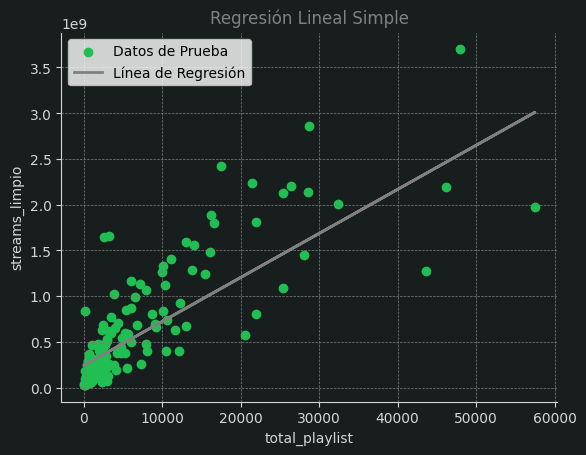


Datos del modelo Regresión Lineal Simple

Valor de la pendiente o coeficiente "a":
[48167.2329707]
Valor de la intersección o coeficiente "b":
240246808.08378136

La ecuación del modelo es igual a:
y = a * x + b
y = [48167.2329707] * x + 240246808.08378136
Precisión del modelo:
0.5951649328795701


In [7]:
# Definir las columnas para X y Y para H3 Total Playlist vs Streams
X_column = 'total_playlist'
Y_column = 'streams_limpio'

# Eliminar filas con valores faltantes en X o Y
df_clean = df.dropna(subset=[X_column, Y_column])

# Extraer los datos correspondientes después de eliminar valores faltantes
X = df_clean[[X_column]]
Y = df_clean[Y_column]

# Asegurarse de que X y Y tengan el mismo número de filas
print(f"Number of samples in X: {len(X)}, Number of samples in Y: {len(Y)}")

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(Y_test, Y_pred)
print('Error Cuadrático Medio (MSE):', mse)

r2 = r2_score(Y_test, Y_pred)
print('Coeficiente de Determinación (R²):', r2)

# Visualizar la línea de regresión
plt.scatter(X_test, Y_test, color='#21BE51', label='Datos de Prueba')
plt.plot(X_test, Y_pred, color='gray', linewidth=2, label='Línea de Regresión')
plt.xlabel(X_column, color='#CFD9D4')
plt.ylabel(Y_column, color='#CFD9D4')
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.title('Regresión Lineal Simple', color='gray')
plt.gca().set_facecolor('#181E1E')
plt.gcf().set_facecolor('#181E1E')

# Cambiar el color de las líneas de los ejes
plt.gca().spines['bottom'].set_color('#CFD9D4')
plt.gca().spines['left'].set_color('#CFD9D4')
plt.gca().spines['top'].set_color('#181E1E')
plt.gca().spines['right'].set_color('#181E1E')

# Cambiar el color de los ticks de los ejes
plt.gca().tick_params(axis='x', colors='#CFD9D4')
plt.gca().tick_params(axis='y', colors='#CFD9D4')

plt.legend()
plt.show()

# Datos del modelo de Regresión Lineal Simple
print()
print('Datos del modelo Regresión Lineal Simple')
print()
print('Valor de la pendiente o coeficiente "a":')
print(model.coef_)
print('Valor de la intersección o coeficiente "b":')
print(model.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('y = a * x + b')
print('y =', model.coef_, '* x +', model.intercept_)
print('Precisión del modelo:')
print(model.score(X_train, Y_train))

Number of samples in X: 947, Number of samples in Y: 947
Error Cuadrático Medio (MSE): 3.683642729507254e+17
Coeficiente de Determinación (R²): 0.025399038835421495


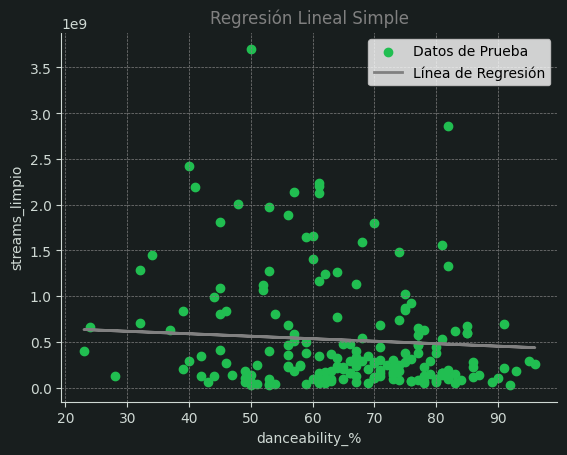


Datos del modelo Regresión Lineal Simple

Valor de la pendiente o coeficiente "a":
[-2712595.96574562]
Valor de la intersección o coeficiente "b":
696717693.865655

La ecuación del modelo es igual a:
y = a * x + b
y = [-2712595.96574562] * x + 696717693.865655
Precisión del modelo:
0.005085317025725122


In [8]:
# Definir las columnas para X y Y para H5 Danceability vs Streams
X_column = 'danceability_%'
Y_column = 'streams_limpio'

# Eliminar filas con valores faltantes en X o Y
df_clean = df.dropna(subset=[X_column, Y_column])

# Extraer los datos correspondientes después de eliminar valores faltantes
X = df_clean[[X_column]]
Y = df_clean[Y_column]

# Asegurarse de que X y Y tengan el mismo número de filas
print(f"Number of samples in X: {len(X)}, Number of samples in Y: {len(Y)}")

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(Y_test, Y_pred)
print('Error Cuadrático Medio (MSE):', mse)

r2 = r2_score(Y_test, Y_pred)
print('Coeficiente de Determinación (R²):', r2)

# Visualizar la línea de regresión
plt.scatter(X_test, Y_test, color='#21BE51', label='Datos de Prueba')
plt.plot(X_test, Y_pred, color='gray', linewidth=2, label='Línea de Regresión')
plt.xlabel(X_column, color='#CFD9D4')
plt.ylabel(Y_column, color='#CFD9D4')
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.title('Regresión Lineal Simple', color='gray')
plt.gca().set_facecolor('#181E1E')
plt.gcf().set_facecolor('#181E1E')

# Cambiar el color de las líneas de los ejes
plt.gca().spines['bottom'].set_color('#CFD9D4')
plt.gca().spines['left'].set_color('#CFD9D4')
plt.gca().spines['top'].set_color('#181E1E')
plt.gca().spines['right'].set_color('#181E1E')

# Cambiar el color de los ticks de los ejes
plt.gca().tick_params(axis='x', colors='#CFD9D4')
plt.gca().tick_params(axis='y', colors='#CFD9D4')

plt.legend()
plt.show()

# Datos del modelo de Regresión Lineal Simple
print()
print('Datos del modelo Regresión Lineal Simple')
print()
print('Valor de la pendiente o coeficiente "a":')
print(model.coef_)
print('Valor de la intersección o coeficiente "b":')
print(model.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('y = a * x + b')
print('y =', model.coef_, '* x +', model.intercept_)
print('Precisión del modelo:')
print(model.score(X_train, Y_train))

Number of samples in X: 947, Number of samples in Y: 947
Error Cuadrático Medio (MSE): 3.767422522388556e+17
Coeficiente de Determinación (R²): 0.0032329731596635325


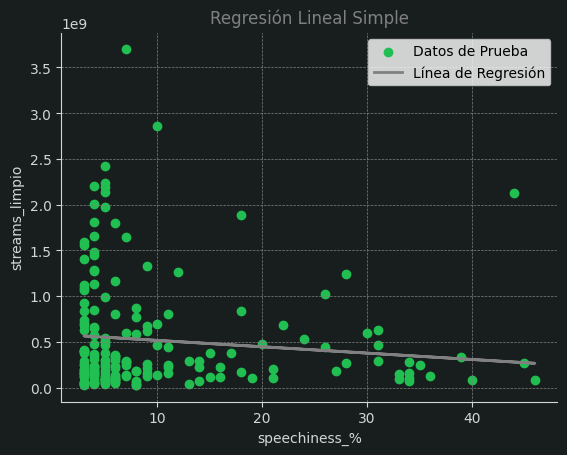


Datos del modelo Regresión Lineal Simple

Valor de la pendiente o coeficiente "a":
[-6954299.91526247]
Valor de la intersección o coeficiente "b":
585228853.783283

La ecuación del modelo es igual a:
y = a * x + b
y = [-6954299.91526247] * x + 585228853.783283
Precisión del modelo:
0.015524221982042063


In [9]:
# Definir las columnas para X y Y para H5 Speechines vs Streams
X_column = 'speechiness_%'
Y_column = 'streams_limpio'

# Eliminar filas con valores faltantes en X o Y
df_clean = df.dropna(subset=[X_column, Y_column])

# Extraer los datos correspondientes después de eliminar valores faltantes
X = df_clean[[X_column]]
Y = df_clean[Y_column]

# Asegurarse de que X y Y tengan el mismo número de filas
print(f"Number of samples in X: {len(X)}, Number of samples in Y: {len(Y)}")

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(Y_test, Y_pred)
print('Error Cuadrático Medio (MSE):', mse)

r2 = r2_score(Y_test, Y_pred)
print('Coeficiente de Determinación (R²):', r2)

# Visualizar la línea de regresión
plt.scatter(X_test, Y_test, color='#21BE51', label='Datos de Prueba')
plt.plot(X_test, Y_pred, color='gray', linewidth=2, label='Línea de Regresión')
plt.xlabel(X_column, color='#CFD9D4')
plt.ylabel(Y_column, color='#CFD9D4')
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.title('Regresión Lineal Simple', color='gray')
plt.gca().set_facecolor('#181E1E')
plt.gcf().set_facecolor('#181E1E')

# Cambiar el color de las líneas de los ejes
plt.gca().spines['bottom'].set_color('#CFD9D4')
plt.gca().spines['left'].set_color('#CFD9D4')
plt.gca().spines['top'].set_color('#181E1E')
plt.gca().spines['right'].set_color('#181E1E')

# Cambiar el color de los ticks de los ejes
plt.gca().tick_params(axis='x', colors='#CFD9D4')
plt.gca().tick_params(axis='y', colors='#CFD9D4')

plt.legend()
plt.show()

# Datos del modelo de Regresión Lineal Simple
print()
print('Datos del modelo Regresión Lineal Simple')
print()
print('Valor de la pendiente o coeficiente "a":')
print(model.coef_)
print('Valor de la intersección o coeficiente "b":')
print(model.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('y = a * x + b')
print('y =', model.coef_, '* x +', model.intercept_)
print('Precisión del modelo:')
print(model.score(X_train, Y_train))

Number of samples in X: 947, Number of samples in Y: 947
Error Cuadrático Medio (MSE): 17687346.71160625
Coeficiente de Determinación (R²): 0.7283935607036356


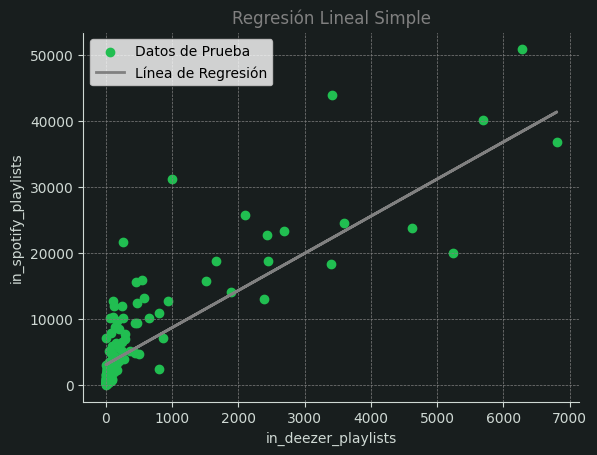


Datos del modelo Regresión Lineal Simple

Valor de la pendiente o coeficiente "a":
[5.62013513]
Valor de la intersección o coeficiente "b":
3061.370803217989

La ecuación del modelo es igual a:
y = a * x + b
y = [5.62013513] * x + 3061.370803217989
Precisión del modelo:
0.6705848116263873


In [10]:
# Definir las columnas para X y Y para H6 Playlists Deezer vs Playlists Spotify
X_column = 'in_deezer_playlists'
Y_column = 'in_spotify_playlists'

# Eliminar filas con valores faltantes en X o Y
df_clean = df.dropna(subset=[X_column, Y_column])

# Extraer los datos correspondientes después de eliminar valores faltantes
X = df_clean[[X_column]]
Y = df_clean[Y_column]

# Asegurarse de que X y Y tengan el mismo número de filas
print(f"Number of samples in X: {len(X)}, Number of samples in Y: {len(Y)}")

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(Y_test, Y_pred)
print('Error Cuadrático Medio (MSE):', mse)

r2 = r2_score(Y_test, Y_pred)
print('Coeficiente de Determinación (R²):', r2)

# Visualizar la línea de regresión
plt.scatter(X_test, Y_test, color='#21BE51', label='Datos de Prueba')
plt.plot(X_test, Y_pred, color='gray', linewidth=2, label='Línea de Regresión')
plt.xlabel(X_column, color='#CFD9D4')
plt.ylabel(Y_column, color='#CFD9D4')
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.title('Regresión Lineal Simple', color='gray')
plt.gca().set_facecolor('#181E1E')
plt.gcf().set_facecolor('#181E1E')

# Cambiar el color de las líneas de los ejes
plt.gca().spines['bottom'].set_color('#CFD9D4')
plt.gca().spines['left'].set_color('#CFD9D4')
plt.gca().spines['top'].set_color('#181E1E')
plt.gca().spines['right'].set_color('#181E1E')

# Cambiar el color de los ticks de los ejes
plt.gca().tick_params(axis='x', colors='#CFD9D4')
plt.gca().tick_params(axis='y', colors='#CFD9D4')

plt.legend()
plt.show()

# Datos del modelo de Regresión Lineal Simple
print()
print('Datos del modelo Regresión Lineal Simple')
print()
print('Valor de la pendiente o coeficiente "a":')
print(model.coef_)
print('Valor de la intersección o coeficiente "b":')
print(model.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('y = a * x + b')
print('y =', model.coef_, '* x +', model.intercept_)
print('Precisión del modelo:')
print(model.score(X_train, Y_train))

Number of samples in X: 947, Number of samples in Y: 947
Error Cuadrático Medio (MSE): 21109213.5884396
Coeficiente de Determinación (R²): 0.6758474613187564


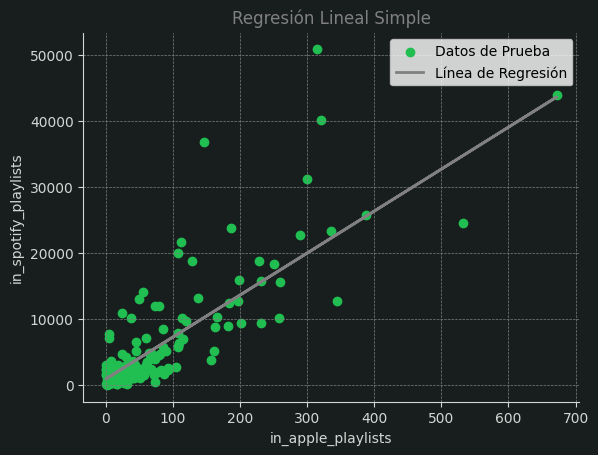


Datos del modelo Regresión Lineal Simple

Valor de la pendiente o coeficiente "a":
[63.52558976]
Valor de la intersección o coeficiente "b":
907.139297209158

La ecuación del modelo es igual a:
y = a * x + b
y = [63.52558976] * x + 907.139297209158
Precisión del modelo:
0.4574176335500709


In [11]:
# Definir las columnas para X y Y para H6 Playlists Deezer vs Playlists Spotify
X_column = 'in_apple_playlists'
Y_column = 'in_spotify_playlists'

# Eliminar filas con valores faltantes en X o Y
df_clean = df.dropna(subset=[X_column, Y_column])

# Extraer los datos correspondientes después de eliminar valores faltantes
X = df_clean[[X_column]]
Y = df_clean[Y_column]

# Asegurarse de que X y Y tengan el mismo número de filas
print(f"Number of samples in X: {len(X)}, Number of samples in Y: {len(Y)}")

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(Y_test, Y_pred)
print('Error Cuadrático Medio (MSE):', mse)

r2 = r2_score(Y_test, Y_pred)
print('Coeficiente de Determinación (R²):', r2)

# Visualizar la línea de regresión
plt.scatter(X_test, Y_test, color='#21BE51', label='Datos de Prueba')
plt.plot(X_test, Y_pred, color='gray', linewidth=2, label='Línea de Regresión')
plt.xlabel(X_column, color='#CFD9D4')
plt.ylabel(Y_column, color='#CFD9D4')
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.title('Regresión Lineal Simple', color='gray')
plt.gca().set_facecolor('#181E1E')
plt.gcf().set_facecolor('#181E1E')

# Cambiar el color de las líneas de los ejes
plt.gca().spines['bottom'].set_color('#CFD9D4')
plt.gca().spines['left'].set_color('#CFD9D4')
plt.gca().spines['top'].set_color('#181E1E')
plt.gca().spines['right'].set_color('#181E1E')

# Cambiar el color de los ticks de los ejes
plt.gca().tick_params(axis='x', colors='#CFD9D4')
plt.gca().tick_params(axis='y', colors='#CFD9D4')

plt.legend()
plt.show()

# Datos del modelo de Regresión Lineal Simple
print()
print('Datos del modelo Regresión Lineal Simple')
print()
print('Valor de la pendiente o coeficiente "a":')
print(model.coef_)
print('Valor de la intersección o coeficiente "b":')
print(model.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('y = a * x + b')
print('y =', model.coef_, '* x +', model.intercept_)
print('Precisión del modelo:')
print(model.score(X_train, Y_train))

In [ ]:
# Declarar el proyecto, dataset y tabla
project_id = "proyecto2-hipotesis-spotify"
dataset = "dataset_spotify"
table = "canciones_solistas_streams"
# Configurar el cliente de BigQuery con el ID del proyecto
client = bigquery.Client(project=project_id)
# Ejecutar la Consulta en BigQuery
query = f"""
SELECT *
FROM `{project_id}.{dataset}.{table}`
"""


# Ejecutar la consulta y convertir los resultados en un DataFrame de pandas
df = client.query(query).to_dataframe()


# Mostrar las primeras filas del DataFrame
print(df.head())

  artist_name_limpio  total_canciones  total_streams
0            G I DLE                2      266983330
1            50 Cent                1     1202722675
2              Adele                4     4508746590
3          Aerosmith                1      838586769
4            Agust D                1      118810253


Number of samples in X: 301, Number of samples in Y: 301
Error Cuadrático Medio (MSE): 8.499539212865327e+17
Coeficiente de Determinación (R²): -0.05365473660685227


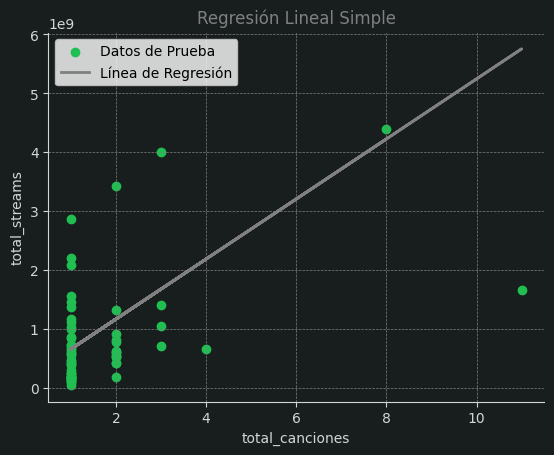


Datos del modelo Regresión Lineal Simple

Valor de la pendiente o coeficiente "a":
[5.10252078e+08]
Valor de la intersección o coeficiente "b":
142959765.21016335

La ecuación del modelo es igual a:
y = a * x + b
y = [5.10252078e+08] * x + 142959765.21016335
Precisión del modelo:
0.6752011781911222


In [ ]:
# Definir las columnas para X y Y para H6 Playlists Deezer vs Playlists Spotify
X_column = 'total_canciones'
Y_column = 'total_streams'

# Eliminar filas con valores faltantes en X o Y
df_clean = df.dropna(subset=[X_column, Y_column])

# Extraer los datos correspondientes después de eliminar valores faltantes
X = df_clean[[X_column]]
Y = df_clean[Y_column]

# Asegurarse de que X y Y tengan el mismo número de filas
print(f"Number of samples in X: {len(X)}, Number of samples in Y: {len(Y)}")

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(Y_test, Y_pred)
print('Error Cuadrático Medio (MSE):', mse)

r2 = r2_score(Y_test, Y_pred)
print('Coeficiente de Determinación (R²):', r2)

# Visualizar la línea de regresión
plt.scatter(X_test, Y_test, color='#21BE51', label='Datos de Prueba')
plt.plot(X_test, Y_pred, color='gray', linewidth=2, label='Línea de Regresión')
plt.xlabel(X_column, color='#CFD9D4')
plt.ylabel(Y_column, color='#CFD9D4')
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.title('Regresión Lineal Simple', color='gray')
plt.gca().set_facecolor('#181E1E')
plt.gcf().set_facecolor('#181E1E')

# Cambiar el color de las líneas de los ejes
plt.gca().spines['bottom'].set_color('#CFD9D4')
plt.gca().spines['left'].set_color('#CFD9D4')
plt.gca().spines['top'].set_color('#181E1E')
plt.gca().spines['right'].set_color('#181E1E')

# Cambiar el color de los ticks de los ejes
plt.gca().tick_params(axis='x', colors='#CFD9D4')
plt.gca().tick_params(axis='y', colors='#CFD9D4')

plt.legend()
plt.show()

# Datos del modelo de Regresión Lineal Simple
print()
print('Datos del modelo Regresión Lineal Simple')
print()
print('Valor de la pendiente o coeficiente "a":')
print(model.coef_)
print('Valor de la intersección o coeficiente "b":')
print(model.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('y = a * x + b')
print('y =', model.coef_, '* x +', model.intercept_)
print('Precisión del modelo:')
print(model.score(X_train, Y_train))